In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
import torch


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def rename_column(df, num = None, alternative = None):
  #logger.debug(df.columns)
  df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_', regex=False).str.replace(r'[, _]+', '_')
  if alternative != None:
    df = df.rename(columns = alternative)
  #logger.debug(df.columns)
  if num != None:
    df.columns = [str(num) + '_' + col for col in df.columns]
  return df

In [5]:
# temp = pd.merge(df1, df2, on = 'hos_no', how = 'outer')

In [6]:
# temp[~temp['hos_no'].isin(df['hos_no'])]['hos_no']

# Start

In [7]:
post = pd.read_excel('/content/drive/MyDrive/SGA/withBiomarker/Delivery_Study of Fetal Growth Restriction (FGR) (Responses).xlsx')
post = rename_column(post, alternative = {'your_hospital_number' : 'hos_no', 'gestational_age,_ga_(weeks)\nthe_week_of_pregnancy_you_gived_birth_to_the_baby' : 'ga_weeks', 'gestational_age,_ga_(days)' : 'ga_days', 'baby_birthweight_(kg)' : 'bw'})
post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column                                                       Non-Null Count  Dtype         
---  ------                                                       --------------  -----         
 0   timestamp                                                    87 non-null     datetime64[ns]
 1   your_name                                                    87 non-null     object        
 2   hos_no                                                       87 non-null     int64         
 3   date_of_delivery                                             87 non-null     datetime64[ns]
 4   ga_weeks                                                     87 non-null     int64         
 5   ga_days                                                      87 non-null     int64         
 6   baby_status                                                  87 non-null     object        
 7   gender             

In [8]:
post['birth_ga'] = post['ga_weeks'] * 7 + post['ga_days']
post = post[['hos_no', 'date_of_delivery', 'birth_ga', 'gender', 'bw']]
post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   hos_no            87 non-null     int64         
 1   date_of_delivery  87 non-null     datetime64[ns]
 2   birth_ga          87 non-null     int64         
 3   gender            87 non-null     object        
 4   bw                87 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.5+ KB


In [9]:
scan1 = pd.read_excel('/content/drive/MyDrive/SGA/withBiomarker/First Scan (11 - 13 + 6 weeks)_Study of Fetal Growth Restriction (FGR) (Responses).xlsx')
scan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 69 columns):
 #   Column                                                                                                                                                                                           Non-Null Count  Dtype         
---  ------                                                                                                                                                                                           --------------  -----         
 0   Timestamp                                                                                                                                                                                        110 non-null    datetime64[ns]
 1   1. Participant's Hospital Number                                                                                                                                                                 110 non-nu

In [10]:
scan1 = rename_column(scan1, num = 1, alternative = {'1._participant\'s_hospital_number' : 'hos_no',
                                          '3._participant\'s_race' : 'm_race',
                                          '4._participant\'s_date_of_birth' : 'm_dob',
                                          '6._participant\'s_weight_taken_date_at_first_visit' : 'weight_taken_date',
                                          '7._participant\'s_weight_at_first_visit_(kg)' : 'm_weight',
                                          '8._participant\'s_height_(cm)' : 'm_height',
                                          '9._participant\'s_bmi' : 'm_age',
                                          '10._does_participant_currently_uses_tobacco_products_(cigarettes)?' : 'm_smoking',
                                          '11._does_participant_currently_consumes_alcohol?' : 'm_alcohol',
                                          '12._participants_conception' : 'conception',
                                          '2._participant\'s_husband\'s_age' : 'f_age',
                                          '3._participant\'s_husband\'s_height_(cm)' : 'f_height',
                                          '4._participant\'s_husband\'s_weight_(kg)' : 'f_weight',
                                          '5._participant\'s_husband\'s_bmi' : 'f_bmi',
                                          '6._participant\'s_husband\'s_medical_history__(if_not,_please_simply_reply_"no")' : 'f_medical_history',
                                          '7._does_participant\'s_husband_uses_tobacco_products_(cigarettes)?' : 'f_smoking',
                                          '8._does_participant\'s_husband_consumes_alcohol?' : 'f_alcohol',
                                          '1._participant\'s_gravida' : 'gravida',
                                          '2._participant\'s_parity' : 'parity',
                                          '3._gestational_age,_ga_(weeks)' : 'ga_weeks',
                                          '4._gestational_age,_ga_(days)' : 'ga_days',
                                          '5._participant\'s_hemoglobin_(hb)_level' : 'hb',
                                          '6._what_is_participant\'s_hypertension_diagnosis?' : 'hypertension',
                                          '7._what_is_participant\'s_diabetes_diagnosis?' : 'diabetes',
                                          '8._have_participant_taken_any_medications_or_drugs_recently?_(if_not,_please_simply_reply_"no")' : 'medications',
                                          '9._have_participant_experienced_any_other_complications_during_her_present_pregnancy?_(if_not,_please_simply_reply_"no")' : 'others',
                                          '1._do_participant_had_hypertension_in_the_past_pregnancy?' : 'past_hypertension',
                                          '2._if_yes_for_gestational_hypertension_in_the_past_pregnancy,_when_is_it?' : 'past_gih',
                                          '3._do_participant_had_pre-eclampsia_in_the_past_pregnancy?' : 'past_pre_eclampsia',
                                          '5._do_participant_had_diabetes_in_the_past_pregnancy?' : 'past_diabetes',
                                          '6._have_participant_experienced_any_other_complications_during_her_past_pregnancy?_for_example,_chronic_kidney_disease,_connective_disease_,_endocrine,_etc._(if_not,_please_simply_reply_"no")' : 'past_other',
                                          '1._did_the_participant_has_a_previous_baby_who_was_classified_as_small-for-gestational-age_(small_baby)?' : 'past_sga',
                                          '2._if_yes,_what_is_the_gestational_age_at_diagnosis?' : 'past_sga_ga_diagnosis',
                                          '3._if_yes,_what_is_the_gestational_age_at_delivery?' : 'past_sga_birth_ga',
                                          '4._if_yes,_what_is_the_baby\'s_weight_at_delivery?' : 'past_sga_bw',
                                          '1._when_is_the_delivery_for_the_past_pregnancy?' : 'past_birth_date',
                                          '2._what_is_the_baby_outcome_for_the_past_pregnancy?' : 'past_outcome',
                                          '4._what_is_the_gender_of_the_baby_for_the_past_pregnancy?' : 'past_gender',
                                          '5._what_is_the_baby\'s_birth_weight_at_the_past_delivery?' : 'past_bw',
                                          '1._last_menstrual_period,_lmp' : 'lmp',
                                          '2._expected_date_of_delivery,_edd' : 'edd',
                                          '3._maternal_blood_pressure_of_left_arm_(systolic_bp_1)' : 'left_arm_systolic_bp_1',
                                          '4._maternal_blood_pressure_of_left_arm_(systolic_bp_2)' : 'left_arm_systolic_bp_2',
                                          '5._maternal_blood_pressure_of_left_arm_(diastolic_bp_1)' : 'left_arm_diastolic_bp_1',
                                          '6._maternal_blood_pressure_of_left_arm_(diastolic_bp_2)' : 'left_arm_diastolic_bp_2',
                                          '7._maternal_blood_pressure_of_right_arm_(systolic_bp_1)' : 'right_arm_systolic_bp_1',
                                          '8._maternal_blood_pressure_of_right_arm_(systolic_bp_2)' : 'right_arm_systolic_bp_2',
                                          '9._maternal_blood_pressure_of_right_arm_(diastolic_bp_1)' : 'right_arm_diastolic_bp_1',
                                          '10._maternal_blood_pressure_of_right_arm_(diastolic_bp_2)' : 'right_arm_diastolic_bp_2',
                                          '11._pregnancy-associated_plasma_protein_a,_papp-a_level_(mom)' : 'papp-a',
                                          '12._free_beta-hcg_(mom)' : 'free_beta_hcg',
                                          '13._crown-rump_length,_crl_(mm)' : 'crl',
                                          '14._nuchal_translucency,_nt_(mm)' : 'nt',
                                          '15._fetal_heart_rate_(bpm)' : 'fetal_heart_rate',
                                          '16._uterine_artery_pi_left' : 'uapi_left',
                                          '17._uterine_artery_pi_right' : 'uapi_right',
                                          '18._uterine_artery_ri_left' : 'uari_left',
                                          '19._uterine_artery_ri_right' : 'uari_right',
                                          '20._notch' : 'notch'
                                          })
scan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 69 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   1_timestamp                                          110 non-null    datetime64[ns]
 1   1_hos_no                                             110 non-null    int64         
 2   1_2._participant's_name                              110 non-null    object        
 3   1_m_race                                             110 non-null    object        
 4   1_m_dob                                              110 non-null    datetime64[ns]
 5   1_5._participant's_phone_number                      110 non-null    object        
 6   1_weight_taken_date                                  110 non-null    datetime64[ns]
 7   1_m_weight                                           110 non-null    float64       
 8   

In [11]:
scan2 = pd.read_excel('/content/drive/MyDrive/SGA/withBiomarker/Second Scan_Study of Fetal Growth Restriction (FGR) (Responses).xlsx')
scan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 29 columns):
 #   Column                                                                                       Non-Null Count  Dtype         
---  ------                                                                                       --------------  -----         
 0   Timestamp                                                                                    109 non-null    datetime64[ns]
 1   Participant's Hospital Number                                                                109 non-null    int64         
 2   Gestational Age, GA (weeks)                                                                  109 non-null    int64         
 3   Gestational Age, GA (days)                                                                   109 non-null    int64         
 4   Fetus Gender                                                                                 10 non-null     object 

In [12]:
scan2 = rename_column(scan2, num = 2, alternative = {
    'participant\'s_hospital_number' : 'hos_no',
    'gestational_age,_ga_(weeks)' : 'ga_weeks',
    'gestational_age,_ga_(days)' : 'ga_days',
    'fetus_gender' : 'gender',
    'weight_(kg)' : 'm_weight',
    'maternal_blood_pressure_(systolic_bp)' : 'systolic_bp',
    'maternal_blood_pressure_(diastolic_bp)' : 'diastolic_bp',
    'fetal_heart_rate_(bpm)' : 'heart_rate',
    'biparietal_diameter,_bpd_(mm)' : 'bpd',
    'head_circumference,_hc_(mm)' : 'hc',
    'cisterna_magna,_cm_(mm)' : 'cm',
    'nuchal_fold_(mm)' : 'nf',
    'abdominal_circumference,_ac_(mm)' : 'ac',
    'femur_length,_fl_(mm)' : 'fl',
    'humerus,_hl_(mm)' : 'hl',
    'location_of_placenta_in_the_uterus' : 'placenta_site',
    'presentation_of_the_fetus' : 'presentation',
    'estimated_fetal_weight_(g)_[hadlock(bpd-hc-ac-fl)]' : 'efw',
    'estimated_fetal_weight_centile' : 'efw_centile',
    'uterine_artery_pi_left' : 'uapi_left',
    'uterine_artery_pi_right' : 'uapi_right',
    'uterine_artery_ri_left' : 'uari_left',
    'uterine_artery_ri_right' : 'uari_right',
    'amniotic_fluid' : 'af',
    'does_fetus_has_any_structural_abnormalities?' : 'abnormalities',
    'does_participant_experiences_any_obstetric_complication?_(if_not,_please_simply_reply_"no")' : 'complication',
    'cerebellum,_tcd_(mm)' : 'tcd',
    'notch' : 'notch'
})
scan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   2_timestamp      109 non-null    datetime64[ns]
 1   2_hos_no         109 non-null    int64         
 2   2_ga_weeks       109 non-null    int64         
 3   2_ga_days        109 non-null    int64         
 4   2_gender         10 non-null     object        
 5   2_m_weight       8 non-null      float64       
 6   2_systolic_bp    7 non-null      float64       
 7   2_diastolic_bp   7 non-null      float64       
 8   2_heart_rate     99 non-null     float64       
 9   2_bpd            109 non-null    float64       
 10  2_hc             109 non-null    float64       
 11  2_cm             109 non-null    float64       
 12  2_nf             109 non-null    object        
 13  2_ac             109 non-null    float64       
 14  2_fl             109 non-null    float64  

In [13]:
duplicate_hos_no = scan2['2_hos_no'][scan2['2_hos_no'].duplicated()].unique()
duplicate_hos_no

array([37104588, 36543070, 23276797])

In [14]:
scan2 = scan2.drop_duplicates(subset=['2_hos_no'])

In [15]:
scan2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 0 to 105
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   2_timestamp      106 non-null    datetime64[ns]
 1   2_hos_no         106 non-null    int64         
 2   2_ga_weeks       106 non-null    int64         
 3   2_ga_days        106 non-null    int64         
 4   2_gender         10 non-null     object        
 5   2_m_weight       8 non-null      float64       
 6   2_systolic_bp    7 non-null      float64       
 7   2_diastolic_bp   7 non-null      float64       
 8   2_heart_rate     96 non-null     float64       
 9   2_bpd            106 non-null    float64       
 10  2_hc             106 non-null    float64       
 11  2_cm             106 non-null    float64       
 12  2_nf             106 non-null    object        
 13  2_ac             106 non-null    float64       
 14  2_fl             106 non-null    float64       

In [16]:
df = pd.merge(scan1, scan2, left_on = '1_hos_no', right_on = '2_hos_no', how = 'inner')
df = pd.merge(df, post, left_on = '1_hos_no', right_on = 'hos_no', how = 'inner')
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 103 columns):
 #    Column                                               Non-Null Count  Dtype         
---   ------                                               --------------  -----         
 0    1_timestamp                                          79 non-null     datetime64[ns]
 1    1_hos_no                                             79 non-null     int64         
 2    1_2._participant's_name                              79 non-null     object        
 3    1_m_race                                             79 non-null     object        
 4    1_m_dob                                              79 non-null     datetime64[ns]
 5    1_5._participant's_phone_number                      79 non-null     object        
 6    1_weight_taken_date                                  79 non-null     datetime64[ns]
 7    1_m_weight                                           79 non-null     float64    

In [17]:
df.drop(columns = ['1_2._participant\'s_name', '1_5._participant\'s_phone_number', '1_1._participant\'s_husband_name', '1_4._if_yes_for_pre-eclampsia,_when_is_it?', '1_3._if_neonatal_death,_what_is_the_cause_of_death?', '1_5._others_(more_than_1_baby_or_baby_situation)', '1_medications', '1_past_gih', '1_past_sga_ga_diagnosis', '1_others', '1_uari_left', '1_uari_right', '1_notch', '1_past_sga_birth_ga', '1_past_sga_bw', '1_m_smoking', '1_m_alcohol', '1_f_bmi', '1_f_height', '1_f_weight', '1_f_medical_history', '1_diabetes', '1_hypertension', '1_past_birth_date', '1_past_outcome', '1_past_pre_eclampsia', '1_past_hypertension', '1_past_other', '1_lmp', '1_m_dob', '1_weight_taken_date', '1_edd', '2_m_weight', '2_systolic_bp', '2_diastolic_bp', '2_efw_centile', '2_notch', '2_abnormalities', '2_complication', '2_af'], axis = 1, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   1_timestamp                     79 non-null     datetime64[ns]
 1   1_hos_no                        79 non-null     int64         
 2   1_m_race                        79 non-null     object        
 3   1_m_weight                      79 non-null     float64       
 4   1_m_height                      79 non-null     float64       
 5   1_m_age                         79 non-null     float64       
 6   1_conception                    79 non-null     object        
 7   1_f_age                         79 non-null     int64         
 8   1_f_smoking                     79 non-null     object        
 9   1_f_alcohol                     79 non-null     object        
 10  1_gravida                       79 non-null     int64         
 11  1_parity

In [19]:
df['1_previous_failed_pregnancy'] = (df['1_gravida'] - df['1_parity'] - 1)
df['1_previous_failed_pregnancy'] = np.where(df['1_previous_failed_pregnancy'] < 0, 0, df['1_previous_failed_pregnancy'])
df['1_previous_failed_pregnancy'] = df['1_previous_failed_pregnancy'].fillna(0).astype(int)

In [20]:
df['1_fetal_heart_rate'] = pd.to_numeric(df['1_fetal_heart_rate'], errors = 'coerce').fillna(0)

In [21]:
df['1_down\'s_syndrome'] = df['1_down\'s_syndrome'].str.replace('1:', '').astype(int)
df['1_edward\'s_and_patau_syndrome'] = df['1_edward\'s_and_patau_syndrome'].str.replace('1:', '').astype(int)

In [22]:
df['1_hb'] = pd.to_numeric(df['1_hb'], errors='coerce').fillna(0).astype(float)

In [23]:
df['1_past_bw'] = df['1_past_bw'].replace('3.8kg', '3.8')
df['1_past_bw'] = pd.to_numeric(df['1_past_bw'], errors = 'coerce').fillna(0).astype(float)

In [24]:
df['1_ga'] = df['1_ga_weeks'] * 7 + df['1_ga_days']
df['2_ga'] = df['2_ga_weeks'] * 7 + df['2_ga_days']

In [25]:
df.drop(columns = ['1_6._others_(more_than_1_baby)', '1_gravida', '1_parity', '2_gender', '1_hos_no', '2_hos_no', '1_ga_weeks', '1_ga_days', '2_ga_weeks', '2_ga_days'], axis = 1, inplace = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   1_timestamp                    79 non-null     datetime64[ns]
 1   1_m_race                       79 non-null     object        
 2   1_m_weight                     79 non-null     float64       
 3   1_m_height                     79 non-null     float64       
 4   1_m_age                        79 non-null     float64       
 5   1_conception                   79 non-null     object        
 6   1_f_age                        79 non-null     int64         
 7   1_f_smoking                    79 non-null     object        
 8   1_f_alcohol                    79 non-null     object        
 9   1_hb                           79 non-null     float64       
 10  1_past_diabetes                13 non-null     object        
 11  1_past_sga           

In [27]:
df['1_m_race'].replace({'Malay' : 0, 'MALAY' : 0, 'BUMIPUTERA' : 0, 'CHINESE' : 1, 'INDIAN' : 2}, inplace = True)
df['1_m_race'] = df['1_m_race'].astype(int)

In [28]:
def convert_feature_to_label(df, cols):
  for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
  return df

In [29]:
df = convert_feature_to_label(df, ['1_conception', '1_f_smoking', '1_f_alcohol', '1_past_diabetes', '1_past_sga', '1_past_gender', '2_placenta_site', '2_presentation'])

In [30]:
df['gender'] = df['gender'].replace({'Female' : 0, 'Male' : 1})

In [31]:
df['2_nf'] = pd.to_numeric(df['2_nf'], errors = 'coerce').fillna(0).astype(float)
df['2_uapi_left'] = pd.to_numeric(df['2_uapi_left'], errors = 'coerce').fillna(0).astype(float)

In [32]:
df['2_efw'] = round(10 ** (1.3596 +
      0.0064 * df['2_hc']/10 +
      0.0424 * df['2_ac']/10 +
      0.174 * df['2_fl']/10 +
      0.00061 * df['2_bpd']/10 * df['2_ac']/10 -
      0.00386 * df['2_ac']/10 * df['2_fl']/10))

In [33]:
def compute_EFW_centile(df, centile_df):
  try:
    centile_df = centile_df.rename(columns={'GA' : 'ga'})
    centile_df['ga'] = centile_df['ga'].astype(int)

    df = pd.merge(df, centile_df, left_on = '2_ga', right_on = 'ga', how = 'left')
    refCentile = list(centile_df.columns)[1:]
    ranges = df[[2.5, 5, 10, 25, 50, 75, 90, 95, 97.5]].values.tolist()
    efw = df['2_efw'].values.tolist()
    centile = []

    for i in range(len(efw)):
      if efw[i] >= ranges[i][0] and efw[i] <= ranges[i][-1]:
        for j in range(len(ranges[i])):
          if efw[i] == ranges[i][j]:
            centile.append(refCentile[j])
            break
          if efw[i] < ranges[i][j]:
            centile.append(refCentile[j] - (refCentile[j] - refCentile[j - 1]) * (ranges[i][j] - efw[i]) / (ranges[i][j] - ranges[i][j - 1]))
            break
      else:
        centile.append(0)

    df['2_efw_centile'] = centile
    df.drop(df[df['2_efw_centile'] == 0].index, inplace = True)
    df['2_cur_sga'] = df['2_efw_centile'] <= 10

    assert not df['2_efw_centile'].isna().any(), "There are null values in the 'efw_centile' column after restoration."
    #logger.info("compute_EFW_centile completed successfully.")
    df.drop(columns = [2.5, 5, 10, 25, 50, 75, 90, 95, 97.5], axis = 1, inplace = True)
    return df

  except Exception as e:
    #logger.error(f"Error at compute_EFW_centile: {str(e)}")
    raise


In [34]:
centile_df = pd.read_excel('/content/drive/MyDrive/SGA/Prev/EFW centile.xlsx')
df = compute_EFW_centile(df, centile_df)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 0 to 78
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   1_timestamp                    77 non-null     datetime64[ns]
 1   1_m_race                       77 non-null     int64         
 2   1_m_weight                     77 non-null     float64       
 3   1_m_height                     77 non-null     float64       
 4   1_m_age                        77 non-null     float64       
 5   1_conception                   77 non-null     int64         
 6   1_f_age                        77 non-null     int64         
 7   1_f_smoking                    77 non-null     int64         
 8   1_f_alcohol                    77 non-null     int64         
 9   1_hb                           77 non-null     float64       
 10  1_past_diabetes                77 non-null     int64         
 11  1_past_sga                

In [36]:
def merge_groundtruth(df):
  gt = pd.read_csv('/content/drive/MyDrive/SGA/Ref_Centile/I21_BW.csv')
  gt.columns = gt.columns.str.lower()
  gt.rename(columns = {'ga' : 'birth_ga'}, inplace = True)
  gt['gender'] = gt['gender'].replace({'F' : 0, 'M' : 1})
  df = pd.merge(df, gt, on = ['birth_ga', 'gender'], how = 'left')
  df['sga'] = df['bw'] <= df['p_10']
  df['lbw'] = df['bw'] <= 2.5
  df['sc'] = df['2_cur_sga'] ^ df['sga']
  df.drop(columns = ['p_3', 'p_5', 'p_10', 'p_50', 'p_90', 'p_95', 'p_97'], axis = 1, inplace = True)
  return df

In [37]:
df = merge_groundtruth(df)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   1_timestamp                    77 non-null     datetime64[ns]
 1   1_m_race                       77 non-null     int64         
 2   1_m_weight                     77 non-null     float64       
 3   1_m_height                     77 non-null     float64       
 4   1_m_age                        77 non-null     float64       
 5   1_conception                   77 non-null     int64         
 6   1_f_age                        77 non-null     int64         
 7   1_f_smoking                    77 non-null     int64         
 8   1_f_alcohol                    77 non-null     int64         
 9   1_hb                           77 non-null     float64       
 10  1_past_diabetes                77 non-null     int64         
 11  1_past_sga           

In [39]:
df.to_csv('/content/drive/MyDrive/SGA/withBiomarker/with_biomarker_clean_data.csv')

# Train Model

In [47]:
test = df[['2_ac', '2_bpd', '2_efw', '2_efw_centile', '2_fl', '2_ga', '2_hc', '1_m_age', '1_m_height', '1_m_weight', 'gender', '2_cur_sga', '1_papp-a']]

In [42]:
#test.to_csv('/content/drive/MyDrive/SGA/withBiomarker/with_biomarker_test_data.csv')

In [55]:
def seed_everything(seed):
  np.random.seed(42)

  # Set the seed for random library
  random.seed(42)

  # Set the seed for PyTorch
  torch.manual_seed(42)
  torch.cuda.manual_seed(42)
  torch.cuda.manual_seed_all(42)  # If using multiple GPUs
  torch.backends.cudnn.deterministic = True  # Ensures repeatability
  torch.backends.cudnn.benchmark = False  # Disables auto-tuning for consistency

In [44]:
def convert_feature_to_label(df, col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    return df

def convert_feature_to_one_hot(df, col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    oh = OneHotEncoder(handle_unknown='ignore')
    df_oh = pd.DataFrame(oh.fit_transform(df[[col]]).toarray())
    df = df.join(df_oh)

    rename_dict = {}

    for i, name in zip(df_oh.columns, le.classes_):
        rename_dict[i] = str(col) + '_' + str(name)

    df = df.rename(columns=rename_dict)
    df.drop(col, axis = 1, inplace = True)

    return df

def scale_feature(col, method='std'):
    if method == 'std':
        std = np.std(col)
        mean = np.mean(col)
        return (col - mean) / std, mean, std
    elif method =='minmax':
        min = np.min(col)
        max = np.max(col)
        return (col - min) / max

def calc_metrics(y_true, y_pred, metrics=[]):
    out = []
    #y_pred = y_pred >= 0.8357
    for met in metrics:
        if not met == roc_auc_score:
            out.append(met(y_true, y_pred.argmax(1)))
        else:
            out.append(met(y_true, np.max(y_pred, 1)))

    return out

def calc_class_weights(df, target='sga', type='log'):
    if type == 'log':
        valid_class = df[target].value_counts().sort_index().values
        # 1 / (1+ln(x))
        class_weights = 1./np.log1p(valid_class)
        # Normalize class_weights and multiply with number of classes
        class_weights = class_weights / class_weights.sum() * 2

    elif type == 'normal':
        classes = df[target].value_counts().sort_index().values
        class_weights = classes/df.shape[0]
        class_weights = 1 - class_weights
        class_weights = class_weights / class_weights.sum() * 2

    else:
        class_weights = None

    return class_weights

def ohe(df):
    # OHE for categorical data
    #for col in ['cord', 'presentation', 'placenta_site', 'hypertension', 'diabetes']:
    for col in ['hypertension', 'diabetes']:
        df = convert_feature_to_one_hot(df, col)
    for col in ['gender', 'smoking']:
        df = convert_feature_to_label(df, col)

    # OHE for ordinal data
    df = df.replace({'oligohydramnios' : 0, 'normal' : 1, 'polyhydramnios' : 2})
    return df

def ohe_tri3(df):
    # OHE for categorical data
    for col in ['presentation', 'placenta_site', 'hypertension', 'diabetes']:
        df = convert_feature_to_one_hot(df, col)
    for col in ['gender', 'smoking']:
        df = convert_feature_to_label(df, col)

    # OHE for ordinal data
    df = df.replace({'oligohydramnios' : 0, 'normal' : 1, 'polyhydramnios' : 2})
    return df

def data_impute(df):
    # Iterative data imputation
    imputer = IterativeImputer(random_state = 123)
    imputed = imputer.fit_transform(df)
    return pd.DataFrame(imputed, columns = df.columns)

def sgkf(df, label = 'sga'):
    sgkf = StratifiedGroupKFold(shuffle=True, random_state=123, n_splits = 5)

    df['fold'] = -1

    for fold_num, (_, val_idx) in enumerate(sgkf.split(df, df[label], groups=df.id)):
        df.loc[val_idx, 'fold'] = fold_num

    # tri2[tri2['fold'] == 0].sga.value_counts()
    return df.drop('id', axis=1)

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   2_ac           77 non-null     float64
 1   2_bpd          77 non-null     float64
 2   2_efw          77 non-null     float64
 3   2_efw_centile  77 non-null     float64
 4   2_fl           77 non-null     float64
 5   2_ga           77 non-null     int64  
 6   2_hc           77 non-null     float64
 7   1_m_age        77 non-null     float64
 8   1_m_height     77 non-null     float64
 9   1_m_weight     77 non-null     float64
 10  gender         77 non-null     int64  
 11  2_cur_sga      77 non-null     bool   
 12  1_papp-a       77 non-null     float64
dtypes: bool(1), float64(10), int64(2)
memory usage: 7.4 KB


In [49]:
continuous_col = ['2_ac', '2_bpd', '2_efw', '2_efw_centile', '2_fl', '2_ga', '2_hc', '1_m_age', '1_m_height', '1_m_weight']
test[continuous_col] = scale_feature(test[continuous_col], method = 'std')
test['2_cur_sga'] = test['2_cur_sga'].astype(int)

<ipython-input-49-764d89b46ab0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[continuous_col] = scale_feature(test[continuous_col], method = 'std')


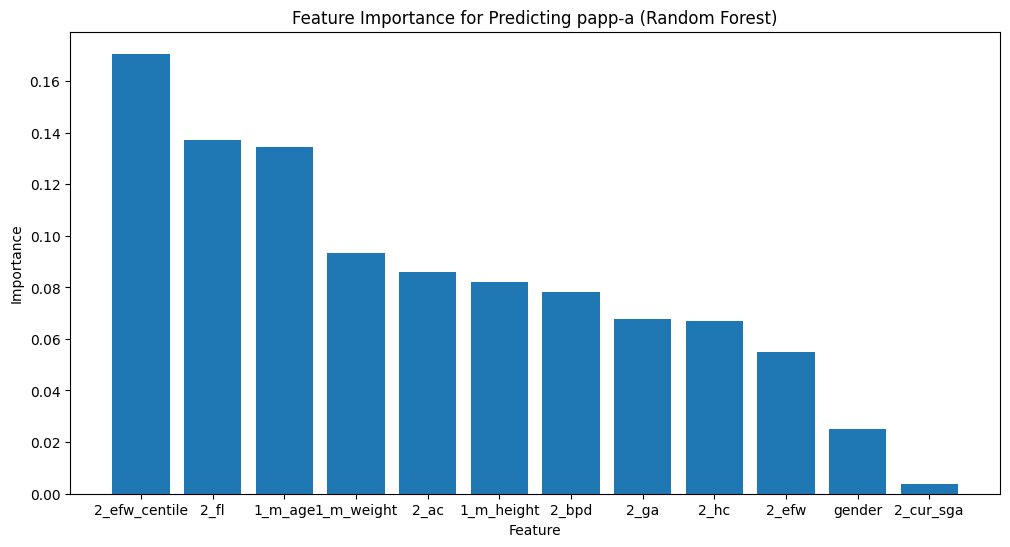

          Feature  Importance
3   2_efw_centile    0.170642
4            2_fl    0.137069
7         1_m_age    0.134314
9      1_m_weight    0.093213
0            2_ac    0.086066
8      1_m_height    0.081907
1           2_bpd    0.078348
5            2_ga    0.067823
6            2_hc    0.066921
2           2_efw    0.055023
10         gender    0.025057
11      2_cur_sga    0.003616


In [60]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your data
#df = pd.read_csv('/content/drive/MyDrive/SGA/withBiomarker/cleaned_first_scan.csv')

# Define the target variable (papp-a) and features (all except 'papp-a')
y = test["1_papp-a"]
X = test.drop(["1_papp-a"], axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance for Predicting papp-a (Random Forest)")
plt.show()

print(importance_df)

Linear Regression: 0.7023866595447281
Decision Tree: 1.4409699166666667
Random Forest: 0.6481987552250003
Gradient Boosting: 0.863138727200466
Support Vector Machine: 0.5581863698935946
K-Nearest Neighbors: 0.7141467533333332


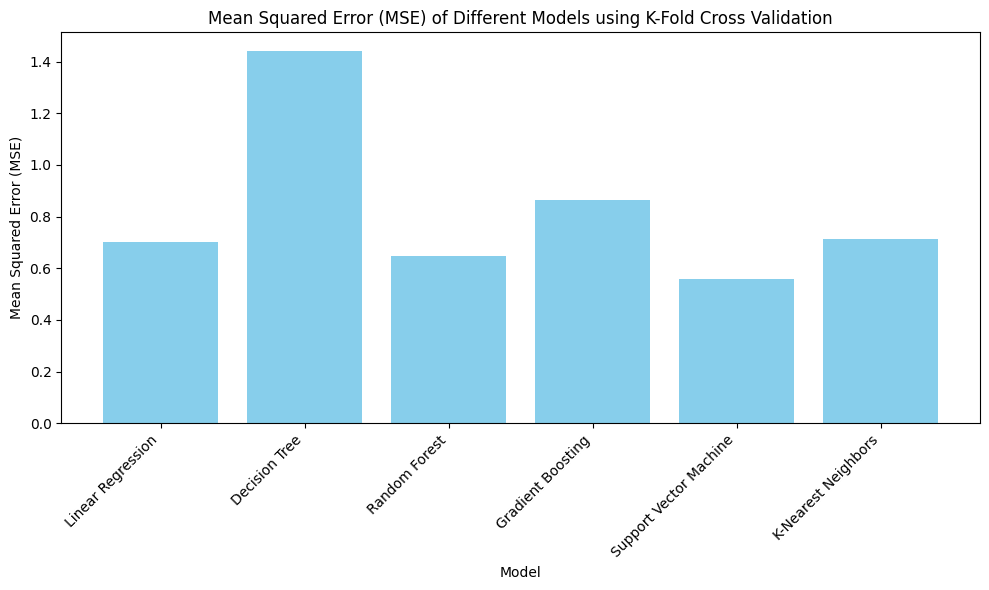

In [67]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

seed = 37
seed_everything(seed)

y_train = test["1_papp-a"]
X_train = test.drop(["1_papp-a"], axis=1)

k = 5
kf = KFold(n_splits = k, shuffle = True, random_state = seed)

models = {
  'Linear Regression': LinearRegression(),
  'Decision Tree': DecisionTreeRegressor(),
  'Random Forest': RandomForestRegressor(),
  'Gradient Boosting': GradientBoostingRegressor(),
  'Support Vector Machine': SVR(),
  'K-Nearest Neighbors': KNeighborsRegressor()
}

mse_scores = {}
for name, model in models.items():
    mse_scores[name] = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    for name, model in models.items():
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        mse = np.mean((y_val_fold - y_pred) ** 2)
        mse_scores[name].append(mse)

average_mse_scores = {name: np.mean(scores) for name, scores in mse_scores.items()}

for name, mse in average_mse_scores.items():
    print(f"{name}: {mse}")

plt.figure(figsize=(10, 6))
plt.bar(average_mse_scores.keys(), average_mse_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) of Different Models using K-Fold Cross Validation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [66]:
best_scores = {name: {'mse': float('inf'), 'seed': None} for name in models.keys()}
seed_list = range(101)  # Seed values from 0 to 100
best_mse = float('inf')
best_seed = None

y_train = test["1_papp-a"]
X_train = test.drop(["1_papp-a"], axis=1)

k = 5
kf = KFold(n_splits = k, shuffle = True, random_state = seed)

models = {
  'Linear Regression': LinearRegression(),
  'Decision Tree': DecisionTreeRegressor(),
  'Random Forest': RandomForestRegressor(),
  'Gradient Boosting': GradientBoostingRegressor(),
  'Support Vector Machine': SVR(),
  'K-Nearest Neighbors': KNeighborsRegressor()
}

for seed in seed_list:
    mse_scores = {}
    for name, model in models.items():
        mse_scores[name] = []

    kf = KFold(n_splits=k, shuffle=True, random_state=seed)

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        for name, model in models.items():
            model.fit(X_train_fold, y_train_fold)
            y_pred = model.predict(X_val_fold)
            mse = np.mean((y_val_fold - y_pred) ** 2)
            mse_scores[name].append(mse)

    average_mse_scores = {name: np.mean(scores) for name, scores in mse_scores.items()}

    for name, mse in average_mse_scores.items():
        if mse < best_scores[name]['mse']:
            best_scores[name]['mse'] = mse
            best_scores[name]['seed'] = seed

print("Best Scores:")
for name, score in best_scores.items():
    print(f"{name}: Seed {score['seed']}, Best MSE: {score['mse']}")

Best Scores:
Linear Regression: Seed 1, Best MSE: 0.601406309888804
Decision Tree: Seed 12, Best MSE: 0.9989833333333333
Random Forest: Seed 77, Best MSE: 0.6109356856666668
Gradient Boosting: Seed 73, Best MSE: 0.7281002476046121
Support Vector Machine: Seed 37, Best MSE: 0.5581863698935946
K-Nearest Neighbors: Seed 44, Best MSE: 0.6097494933333334
